In [1]:
"""
create a cumulative distribution chart of the total years worked across all employees surveyed? You can exclude values that indicate the employee did not state his/her start or end date.

Some notes:

Question 103 will help you convert the Cease Date into a standard format
Total years worked = Cease Date Year - DETE Start Date Year

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/dete-exit-survey-january-2014.csv')
df.sample(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
259,260,Resignation-Move overseas/interstate,2012,2008,2008,Schools Officer,NaN,Metropolitan,NaN,Permanent Full-time,...,D,A,SD,Male,41-45,NaN,NaN,NaN,NaN,NaN
449,450,Resignation-Other employer,2012,Not Stated,Not Stated,Teacher,Primary,South East,NaN,Permanent Full-time,...,SA,D,N,Male,36-40,NaN,NaN,NaN,NaN,NaN
663,665,Voluntary Early Retirement (VER),06/2013,1969,Not Stated,Public Servant,A01-A04,South East,NaN,Permanent Part-time,...,A,A,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN
228,229,Resignation-Other reasons,2012,1994,2012,Cleaner,Primary,South East,NaN,Permanent Part-time,...,A,A,SA,Male,56-60,NaN,NaN,NaN,NaN,NaN
670,672,Resignation-Move overseas/interstate,12/2013,2013,2013,"School Based Professional Staff (Therapist, nu...",NaN,Metropolitan,NaN,Temporary Full-time,...,A,N,N,Female,21-25,NaN,NaN,NaN,NaN,NaN
332,333,Resignation-Other reasons,2012,2011,2011,Cleaner,NaN,Not Stated,NaN,Permanent Full-time,...,A,N,SA,Female,21-25,NaN,NaN,NaN,NaN,NaN
497,498,Resignation-Move overseas/interstate,2013,2009,2009,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,A,D,A,Male,36-40,NaN,NaN,NaN,NaN,NaN
444,445,Age Retirement,2013,1986,2006,Teacher,Secondary,Metropolitan,NaN,Permanent Full-time,...,A,N,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN
253,254,Age Retirement,2012,1996,1996,Cleaner,NaN,North Coast,NaN,Permanent Part-time,...,A,D,D,Female,51-55,NaN,NaN,NaN,NaN,NaN
366,367,Resignation-Move overseas/interstate,2013,2010,2010,Teacher,Secondary,South East,NaN,Permanent Full-time,...,A,D,A,Male,21-25,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [4]:
df['Cease Date'].describe()

count      822
unique      25
top       2012
freq       344
Name: Cease Date, dtype: object

In [5]:
df['Cease Date'].isna().sum()

0

In [6]:
df['Cease Date'].sample(10)

271          2012
683    Not Stated
183          2012
738       10/2013
178          2012
393          2012
498          2013
12           2012
211          2012
489          2012
Name: Cease Date, dtype: object

In [7]:
df['Cease Date'].iloc[748][-4:]

'2013'

In [8]:
type(df['Cease Date'].iloc[20])

str

In [9]:
df['DETE Start Date'].describe()

count            822
unique            51
top       Not Stated
freq              73
Name: DETE Start Date, dtype: object

In [10]:
df['DETE Start Date'].isna().sum()

0

In [11]:
def to_year(string):
    if string.isnumeric():
        return int(string[-4:])
    else:
        return np.nan

In [12]:
to_year('aba2')

nan

In [13]:
df['end_year'] = df['Cease Date'].apply(to_year)

In [14]:
df['start_year'] = df['DETE Start Date'].apply(to_year)

In [15]:
new_df = df[['end_year', 'start_year']].dropna(axis=0)

In [16]:
new_df['years worked'] = new_df['end_year'] - new_df['start_year']

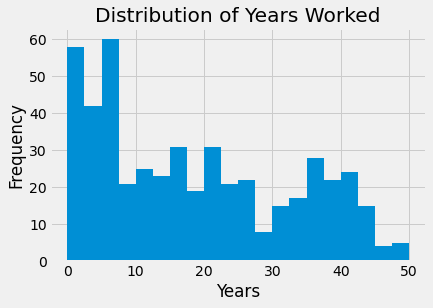

In [17]:
new_df['years worked'].hist(bins=20)
plt.title("Distribution of Years Worked")
plt.xlabel('Years')
plt.ylabel('Frequency');